# Slow fast dissection to understand the effect of $\tau_{s, \rm mut}$, case $I_{\rm app}=20$

$\tau_{s, \rm mut}$: control how fast slow inactivation develops 

Model: Hu, version with slow inactivation. Defined [here](utils/point_models/hu_slow_inact/hu_slow_inact.py).

Script to compute the bifurcation diagram of the fast subsystem: [here](bd_wrt_gna_hu.py).

In [9]:
import utils.simu_helper as simu_helper
import utils.plot_helper as plot_helper
import utils.auto_helper as auto_helper
import bd_wrt_gna_hu

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
run_simu = True
run_continuation = False  # was already done for Figure 2

In [11]:
# model
model_name = "hu_slow_inact"
model = simu_helper.import_model(model_name)
auto_dir = auto_helper.compute_auto_dir("hu")

# parameter sets
param_set_ids = ["inact_shift_all_channels", "altered_inact_all_channels"]
my_params = [model.params_default | getattr(model, f"params_{param_set_id}") for param_set_id in param_set_ids]

# applied current
i_app_val = 20
t_start = 10000 # in ms
time_shift = t_start/1000  # in seconds

# temporary initial condition
y_0 = [-60, 0.5, 0.5, 0.5, 0.5, 0.5]

# simulation duration
t_end = 300000 + t_start


## Continuation

In [12]:
if run_continuation:
    bd_wrt_gna_hu.compute_bd(i_app_val)

## Load or run simulations

In [13]:
accuracy_scaling = 1000000
def run_or_load_long_simu(my_simu, do_run):
    if do_run:
        # find resting state
        my_simu.model_params["i_app"] = 0
        my_simu.run(rtol=accuracy_scaling*1e-13, atol=accuracy_scaling*1e-19)
        my_simu.plot_time_traces();
        y_0_rest = my_simu.sol.y[:,-1]
        # actual simulation
        my_simu.y_0 = y_0_rest
        my_simu.t_end = t_end
    my_simu.model_params["t_start"] = t_start
    my_simu.model_params["i_app_step_val"] = i_app_val
    if do_run:
        my_simu.run(rtol=accuracy_scaling*1e-13, atol=accuracy_scaling*1e-19)
        my_simu.save_sol(model_name, i_app_val, id="long_simu")
    else:
        my_simu.load_sol(model_name, i_app_val, id="long_simu")
    my_simu.plot_time_traces();


output/hu_slow_inact/inact_shift_all_channels/long_simu/sol_i_app_20.pickle
output/hu_slow_inact/altered_inact_all_channels/long_simu/sol_i_app_20.pickle


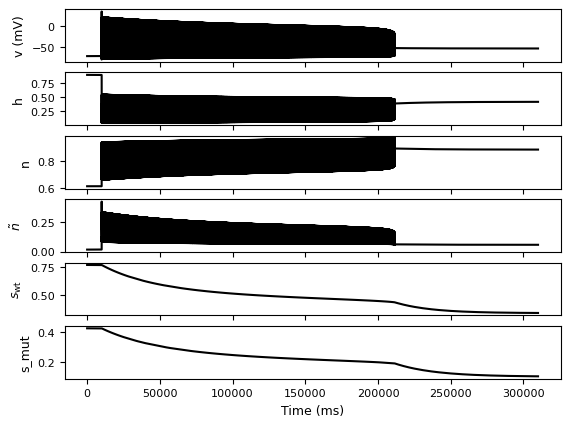

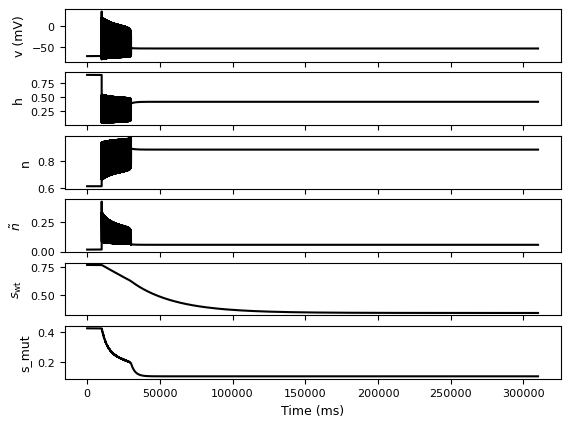

In [14]:
# this simulation was already done for another figure
my_simu_tonic_spiking_mut_1 = simu_helper.Simulation(model.rhs, my_params[0], None, None, id=param_set_ids[0])
run_or_load_long_simu(my_simu_tonic_spiking_mut_1, do_run=False)

my_simu_tonic_spiking_mut_2 = simu_helper.Simulation(model.rhs, my_params[1], y_0, 1000000, id=param_set_ids[1])
run_or_load_long_simu(my_simu_tonic_spiking_mut_2, do_run=run_simu)


## Steady state voltage dependence of slow inactivation

In [15]:
v_vals = np.linspace(-140, 50, 1000)
s_inf_vals = model.s_inf(v_vals, model.params_default)
shift_s = my_params[1]["shift_s"]
s_inf_vals_shifted = model.s_inf(v_vals-shift_s, model.params_default)

## Figure

Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data
Parsed output data


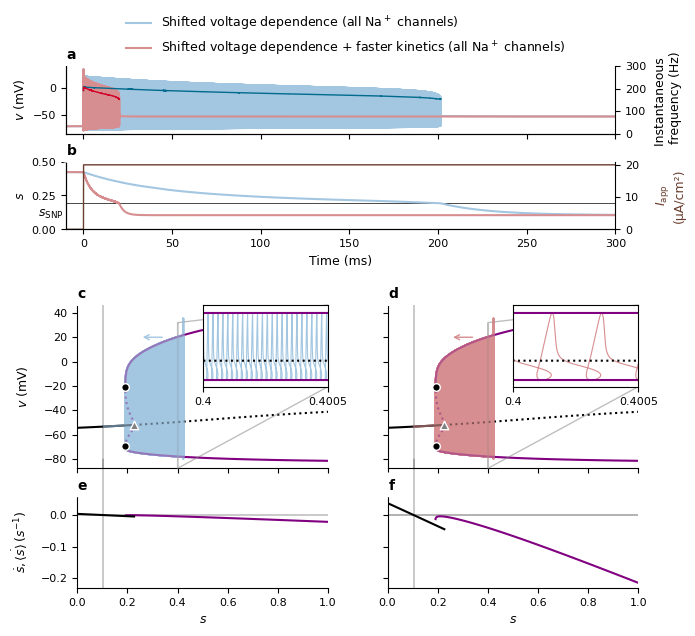

In [16]:
fig = plt.figure()
fig.set_size_inches(plot_helper.fig_size_default["width"], 6.2)

# figure layout
n_rows = 23
n_cols = 50

ax_trace_wt_v = plt.subplot2grid((n_rows, n_cols), (1, 0), colspan=48, rowspan=3)
ax_trace_wt_s = plt.subplot2grid((n_rows, n_cols), (5, 0), colspan=48, rowspan=3)
ax_current = ax_trace_wt_s.twinx()


ax_superpose_wt = plt.subplot2grid((n_rows, n_cols), (11, 1), colspan=22, rowspan=7)
ax_superpose_mut = plt.subplot2grid((n_rows, n_cols), (11, 28), colspan=22, rowspan=7)

ax_slow_flow_wt = plt.subplot2grid((n_rows, n_cols), (19, 1), colspan=22, rowspan=4)
ax_slow_flow_mut = plt.subplot2grid((n_rows, n_cols), (19, 28), colspan=22, rowspan=4)


# shared axes
plot_helper.share_axis([ax_slow_flow_wt, ax_slow_flow_mut, ax_superpose_wt, ax_superpose_mut], x=True)
plot_helper.share_axis([ax_trace_wt_v, ax_trace_wt_s], x=True)



# axes parameters
ax_slow_flow_wt.set_ylim([-0.23, 0.06])
ax_slow_flow_mut.set_ylim([-0.23, 0.06])

for my_ax in [ax_trace_wt_v, ax_superpose_wt, ax_superpose_mut]:
    plt.setp(my_ax.get_xticklabels(), visible=False)
for my_ax in [ax_superpose_mut, ax_slow_flow_mut]:
    plt.setp(my_ax.get_yticklabels(), visible=False)
for ax in [ax_trace_wt_v]:
    ax.set_ylabel(r"$v$ (mV)")


titles_no_space = ["Shifted voltage dependence (all "+r"$\rm Na^+$"+" channels)", "Shifted voltage dependence + faster kinetics (all "+r"$\rm Na^+$"+" channels)"]

#### 1) slow subsystem
x_scaling = 1/my_params[0]["g_na_tot"]  # (it's the same in the mutation case)
x_fp = 0.1043

# wt case
ax = ax_slow_flow_wt
y_scaling = 1000  # time in second
auto_helper.plot_slow_flow_hu(ax, auto_dir, "wt",  f"branch_lc_wrt_gnatot_i_app_{i_app_val}", my_params[0], x_scaling=x_scaling, y_scaling=y_scaling, param_str="GNATOT", color=auto_helper.colors_bif["LP"])
auto_helper.plot_ds_dt_fp_hu(ax, auto_dir, "wt", f"branch_eq_wrt_gnatot_i_app_{i_app_val}", model.s_inf, my_params[0], xscaling=x_scaling, y_scaling=y_scaling, shift=-15, color="k")
# ax.axhline(y=0, color="grey", zorder=-10)
ax.set_ylabel(r"$\dot{s},\dot{\langle s\rangle}\,(s^{-1})$")
ax.set_xlabel("$s$")
ax.axhline(y=0, color="black", zorder=-10, linewidth=0.3)
ax.axvline(x=x_fp, color="black", zorder=-1000, linewidth=0.3, ymax=1.4, clip_on=False)
# faster slow inactivation
ax = ax_slow_flow_mut
auto_helper.plot_slow_flow_hu(ax, auto_dir, "wt",  f"branch_lc_wrt_gnatot_i_app_{i_app_val}", my_params[1], x_scaling=x_scaling, y_scaling=y_scaling, param_str="GNATOT", color=auto_helper.colors_bif["LP"])
auto_helper.plot_ds_dt_fp_hu(ax, auto_dir, "wt", f"branch_eq_wrt_gnatot_i_app_{i_app_val}", model.s_inf, my_params[1], xscaling=x_scaling, y_scaling=y_scaling, shift=-15, color="k")
ax.axhline(y=0, color="grey", zorder=-10, linewidth=0.3)
ax.set_xlabel("$s$")
ax.axhline(y=0, color="black", zorder=-10, linewidth=0.3)
ax.axvline(x=x_fp, color="black", zorder=-1000, linewidth=0.3, ymax=1.4, clip_on=False)

#### 2) overlay
v_offset = 0
color_mut_2 = "#a3c6e1"

inset_bounds = [0.5, 0.5, 0.5, 0.5]
inset_x_lim = [0.4, 0.4005]
# wt case
ax = ax_superpose_wt
auto_helper.plot_bd(ax, auto_dir, output_dir="wt", run_names=[f"branch_eq_wrt_gnatot_i_app_{i_app_val}", f"branch_lc_wrt_gnatot_i_app_{i_app_val}"], x_scaling=x_scaling)
my_simu_tonic_spiking_mut_1.plot_voltage_wrt_s(ax, zorder=-10, color=plot_helper.color_mut_2, v_offset=v_offset)
my_simu_tonic_spiking_mut_1.plot_voltage_wrt_s(ax, zorder=200, color=plot_helper.color_mut_2, v_offset=v_offset, alpha=0.6)
auto_helper.plot_special_point(ax, auto_dir, "wt", f"branch_eq_wrt_gnatot_i_app_{i_app_val}", label_auto="HB1", label="HB", label_legend="Hopf", x_scaling=x_scaling,
                                **auto_helper.hopf_plot_args)  # edgecolors="#5f3d56"
auto_helper.plot_special_point(ax, auto_dir, "wt", f"branch_lc_wrt_gnatot_i_app_{i_app_val}", label_auto="LP1", label="LPC", label_legend="SNP", x_scaling=x_scaling, **auto_helper.snp_plot_args) #edgecolors="#c36b45"
auto_helper.plot_special_point(ax, auto_dir, "wt", f"branch_lc_wrt_gnatot_i_app_{i_app_val}", label_auto="LP1", label="LPC", x_scaling=x_scaling, var_idx=-1, **auto_helper.snp_plot_args)
# show direction trajs
ax.annotate("", xy=(0.25, 20), xytext=(0.35, 20), arrowprops=dict(arrowstyle="->", color=plot_helper.color_mut_2))
# inset
ax_inset = ax.inset_axes(inset_bounds)
auto_helper.plot_bd(ax_inset, auto_dir, output_dir="wt", run_names=[f"branch_eq_wrt_gnatot_i_app_{i_app_val}", f"branch_lc_wrt_gnatot_i_app_{i_app_val}"], x_scaling=x_scaling)
my_simu_tonic_spiking_mut_1.plot_voltage_wrt_s(ax_inset, zorder=-10, color=plot_helper.color_mut_2, v_offset=v_offset, linewidth=0.8)
ax_inset.set_xlim(inset_x_lim)
ax_inset.set_ylim(top=32)
ax_inset.set_yticks([])
ax_inset.set_xticks([0.4, 0.4005])
ax_inset.set_xticklabels(["0.4", "0.4005"])
ax.indicate_inset_zoom(inset_ax=ax_inset)
ax.axvline(x=x_fp, color="black", zorder=-1000, linewidth=0.3)
ax.set_ylabel(r"$v$ (mV)")

# faster slow inactivation
ax = ax_superpose_mut
auto_helper.plot_bd(ax, auto_dir, output_dir="wt", run_names=[f"branch_eq_wrt_gnatot_i_app_{i_app_val}", f"branch_lc_wrt_gnatot_i_app_{i_app_val}"], x_scaling=x_scaling)
my_simu_tonic_spiking_mut_2.plot_voltage_wrt_s(ax, zorder=-10, color=plot_helper.color_mut, v_offset=v_offset)
my_simu_tonic_spiking_mut_2.plot_voltage_wrt_s(ax, zorder=200, color=plot_helper.color_mut, v_offset=v_offset, alpha=0.6)
auto_helper.plot_special_point(ax, auto_dir, "wt", f"branch_eq_wrt_gnatot_i_app_{i_app_val}", label_auto="HB1", label="HB", label_legend="Hopf", x_scaling=x_scaling,
                                **auto_helper.hopf_plot_args)  # edgecolors="#5f3d56"
auto_helper.plot_special_point(ax, auto_dir, "wt", f"branch_lc_wrt_gnatot_i_app_{i_app_val}", label_auto="LP1", label="LPC", label_legend="SNP", x_scaling=x_scaling, **auto_helper.snp_plot_args) #edgecolors="#c36b45"
auto_helper.plot_special_point(ax, auto_dir, "wt", f"branch_lc_wrt_gnatot_i_app_{i_app_val}", label_auto="LP1", label="LPC", x_scaling=x_scaling, var_idx=-1, **auto_helper.snp_plot_args)
# show direction trajs
ax.annotate("", xy=(0.25, 20), xytext=(0.35, 20), arrowprops=dict(arrowstyle="->", color=plot_helper.color_mut))
# inset
ax_inset = ax.inset_axes(inset_bounds)
auto_helper.plot_bd(ax_inset, auto_dir, output_dir="wt", run_names=[f"branch_eq_wrt_gnatot_i_app_{i_app_val}", f"branch_lc_wrt_gnatot_i_app_{i_app_val}"], x_scaling=x_scaling)
my_simu_tonic_spiking_mut_2.plot_voltage_wrt_s(ax_inset, zorder=-10, color=plot_helper.color_mut, v_offset=v_offset, linewidth=0.8)
ax_inset.set_xlim(inset_x_lim)
ax_inset.set_ylim(top=32)
ax_inset.set_yticks([])
ax_inset.set_xticks([0.4, 0.4005])
ax_inset.set_xticklabels(["0.4", "0.4005"])
ax.indicate_inset_zoom(inset_ax=ax_inset)
ax.axvline(x=x_fp, color="black", zorder=-1000, linewidth=0.3)
ax.set_xlim([0, 1])
# ax.legend(loc="upper left")

#### 3) time traces
colors_freq = [plot_helper.color_mut_2_dark, plot_helper.color_mut_dark]

s_snp = 0.19146

# wild type
ax = ax_trace_wt_v
my_simu_tonic_spiking_mut_1.plot_voltage_trace(ax, unit="second", time_shift=time_shift, color=plot_helper.color_mut_2, label=titles_no_space[0])
ax_freq = my_simu_tonic_spiking_mut_1.plot_inst_freq(ax, time_shift=10, color=colors_freq[0], linewidth=1)
my_simu_tonic_spiking_mut_2.plot_voltage_trace(ax, time_shift=time_shift, unit="second", color=plot_helper.color_mut, label=titles_no_space[1])
my_simu_tonic_spiking_mut_2.plot_inst_freq(ax, ax_freq=ax_freq, time_shift=10, color=colors_freq[1], linewidth=1)
ax_trace_wt_v.legend(loc=[0.1, 1.05], fontsize=9)
ax_freq.set_ylim([0, 300])
ax_freq.set_ylabel("Instantaneous \n frequency (Hz)")

ax = ax_trace_wt_s
my_simu_tonic_spiking_mut_1.plot_one_trace(ax, time_shift=time_shift, var_idx=-1, unit="second", color=plot_helper.color_mut_2)
my_simu_tonic_spiking_mut_2.plot_one_trace(ax, time_shift=time_shift, var_idx=-1, unit="second", color=plot_helper.color_mut)
ax.set_ylabel(r"$s$")
ax.set_ylim([0, 0.5])
ax.set_yticks([0, 0.25, 0.5])
ax.set_xlabel("Time (ms)")
ax_trace_wt_s.axhline(y=s_snp, color="k", linewidth=0.5, zorder=-1)
plot_helper.annotate_blended(ax_trace_wt_s, r"$s_{\rm SNP}$", [-0.05, 0.19], rotation=0)


# applied current
current_color = plot_helper.current_color

ax = ax_current
ax.plot(my_simu_tonic_spiking_mut_1.sol.t/1000 - time_shift, model.i_app_step(my_simu_tonic_spiking_mut_1.sol.t, my_simu_tonic_spiking_mut_1.model_params), color=current_color, linewidth=1)
ax.set_xlabel("Time (s)")
ax.set_ylabel(r"$I_{\rm app}$"+"\n"+u"(\u00B5A/cm\u00B2)", color=current_color)
ax.set_xlim([-time_shift, 300])
ax.set_xticks([0, 60, 120, 180, 240, 300])
ax.set_ylim([0, 21])
ax.set_xlim([-time_shift, 300])


#### beautify
for ax in fig.axes:
    ax.spines[['right', 'top']].set_visible(False)
for ax in [ax_trace_wt_v, ax_current]:
    ax.spines[['right']].set_visible(True)


plot_helper.align_labels(fig, shift=-0.07, y=True, axs=[ax_trace_wt_v, ax_trace_wt_s])
plot_helper.align_labels(fig, shift=-0.19, y=True, axs=[ax_slow_flow_wt, ax_superpose_wt])
plot_helper.align_labels(fig, shift=1.07, y=True, axs=[ax_freq, ax_current])

plot_helper.lettering(fig, pos=[-0, 1.1], labels=["a", None, "b", "c", "d", "e", "f", None, None, None, None, None, None, None])
plt.subplots_adjust(right=0.93, bottom=0.07, top=0.95,  left=0.1)


# save figure
fig_dir = plot_helper.fig_dir
fig_path = f'{fig_dir}/figure_3.png'
plt.savefig(fig_path, format='png', dpi=600)